# Website Phishing 
https://archive.ics.uci.edu/dataset/379/website+phishing

The problem would be to classify the website with the rest of the features as suspicious or safe.
All the data are encoded as -1, 0, 1

# DATA PROCESSING AND CLEANUP

In [2]:
import warnings
import pandas as pd
from scipy.io import arff
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

data = arff.loadarff('/Users/avishmita/IU_Assignments/IU/AML/Assignment 2/Homework 2.2/PhishingData.arff')
website_dataframe= pd.DataFrame(data[0])
website_dataframe.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,b'1',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'0',b'0'
1,b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1'
2,b'1',b'-1',b'0',b'0',b'-1',b'0',b'-1',b'1',b'0',b'1'
3,b'1',b'0',b'1',b'-1',b'-1',b'0',b'1',b'1',b'0',b'0'
4,b'-1',b'-1',b'1',b'-1',b'0',b'0',b'-1',b'1',b'0',b'1'


In [3]:
website_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   Result             1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB


In [4]:
catCols = [col for col in website_dataframe.columns if website_dataframe[col].dtype=="O"]
print(catCols)

['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address', 'Result']


In [5]:
website_dataframe[catCols]=website_dataframe[catCols].apply(lambda x: x.str.decode('utf8'))
website_dataframe.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [6]:
website_dataframe.to_csv('./phishingData.csv',index=False)

In [7]:
# Reading the CSV file
website_dataframe = pd.read_csv('./phishingData.csv')
website_dataframe.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


## Q1. Statistical analysis of Dataframe

In [8]:
# Q.I.i) Statistical Descriptions - TO D0 (one-liner)

website_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [9]:
# Q.I.i) Statistical Descriptions - Summary Statistics 
# To display statistics of the features in the website_dataframe

website_dataframe.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Q.I.ii) Missing values

missing_entries = website_dataframe.isnull().sum()
print(missing_entries)

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64


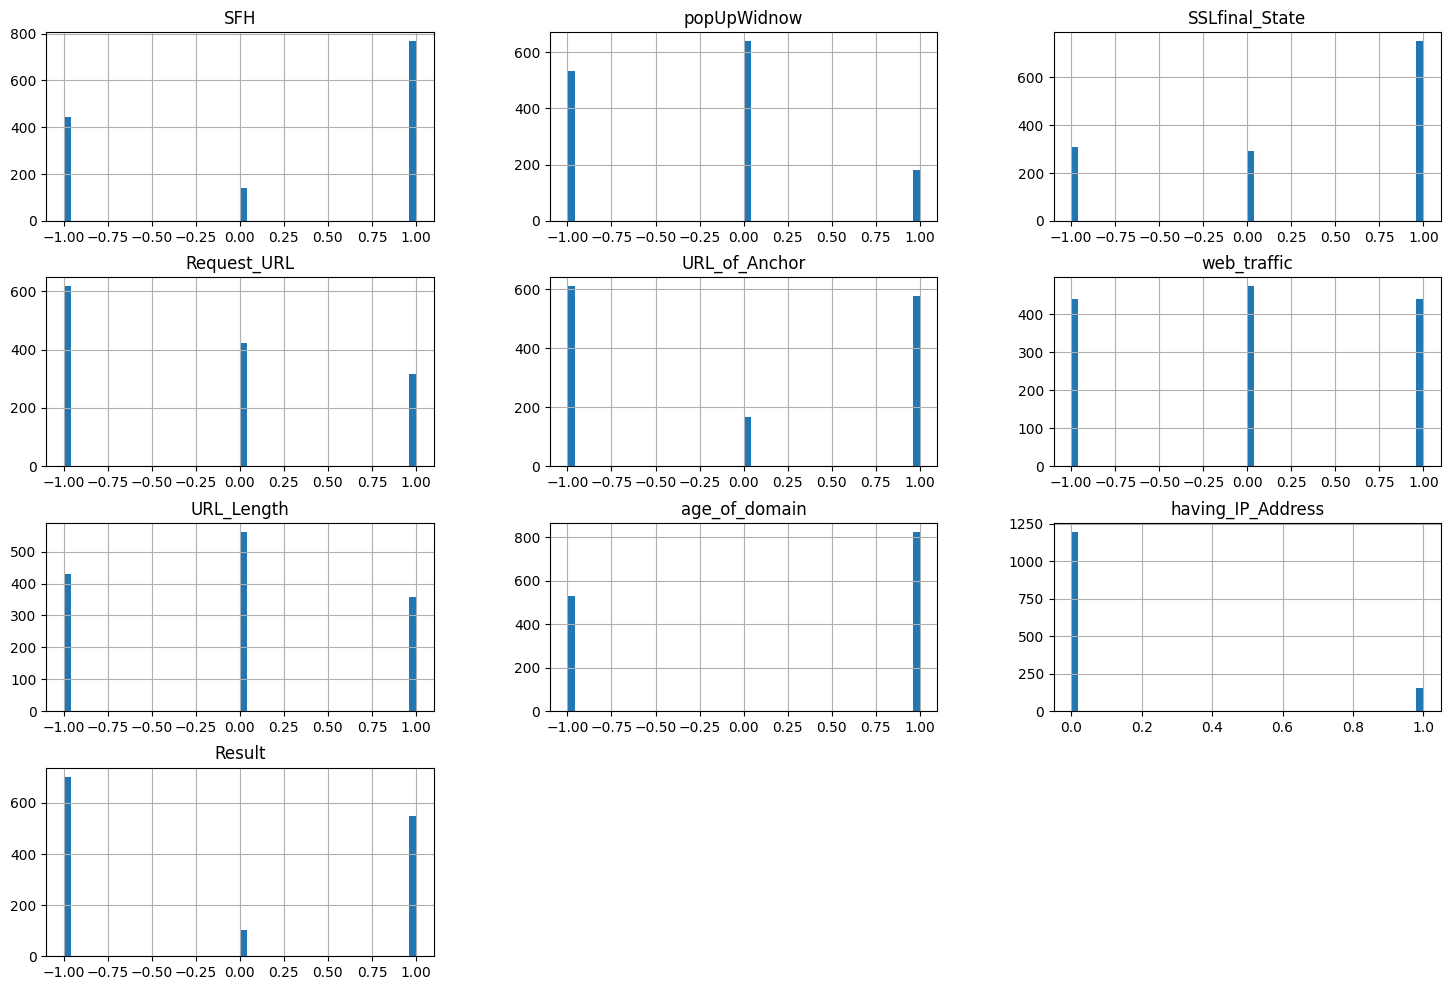

In [11]:
# Q.I.i) Visualisations - Histogram plot
# Plotting the histogram plot for each of the features

import matplotlib.pyplot as plt

website_dataframe.hist(bins=50, figsize=(18, 12))
plt.show()

## Q.2. PCC & Scatter Plots

Result               1.000000
web_traffic          0.243896
having_IP_Address   -0.059225
URL_Length          -0.183061
age_of_domain       -0.231931
Request_URL         -0.271609
URL_of_Anchor       -0.287007
popUpWidnow         -0.509749
SSLfinal_State      -0.518762
SFH                 -0.678277
Name: Result, dtype: float64


<Axes: >

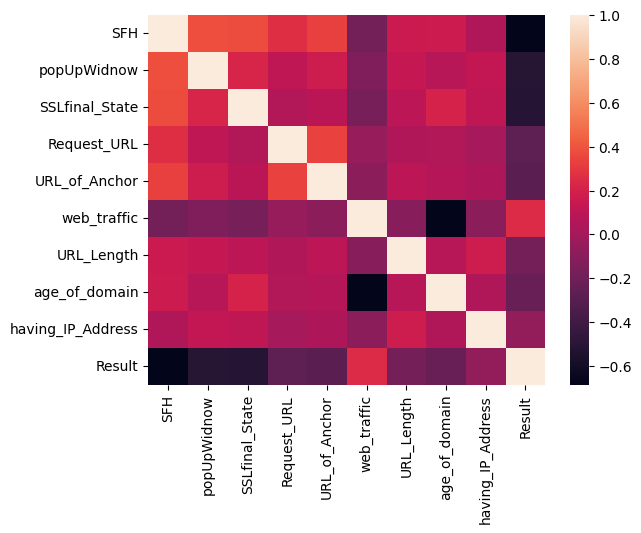

In [12]:
# Q.II.i) Calculating PCC (Pearson's Correlation Coefficient) table for all features

import seaborn as sns

pcc_table = website_dataframe.corr()
sorted_pcc_table = pcc_table["Result"].sort_values(ascending=False)
print(sorted_pcc_table)

# Displaying the heatmap of the table
sns.heatmap(pcc_table)

Taking the features which abs(corelation coefficient) > 0.25 into consideration.\
5 Features : \
Request_URL         -0.271609\
URL_of_Anchor       -0.287007\
popUpWidnow         -0.509749\
SSLfinal_State      -0.518762\
SFH                 -0.678277

The data attribute pair which have a strong correlation between them from the heatmap above are :\
(SFH, popUpWindow)\
(SFH, SSLfinal_State)\
(SFH, URL_of_Anchor)\
(Request_URL, URL_of_Anchor)

In [13]:
# FEATURE SELECTION
# Dropping the columns that are no longer required to visualise

from tabulate import tabulate

columns_to_drop = ['web_traffic', 'having_IP_Address', 'URL_Length', 'age_of_domain']
website_dataframe = website_dataframe.drop(columns=columns_to_drop)

# print(website_dataframe.describe())
print(tabulate(website_dataframe.describe(),headers='keys', tablefmt='pretty'))

+-------+---------------------+---------------------+---------------------+----------------------+-----------------------+----------------------+
|       |         SFH         |     popUpWidnow     |   SSLfinal_State    |     Request_URL      |     URL_of_Anchor     |        Result        |
+-------+---------------------+---------------------+---------------------+----------------------+-----------------------+----------------------+
| count |       1353.0        |       1353.0        |       1353.0        |        1353.0        |        1353.0         |        1353.0        |
| mean  | 0.23798965262379895 | -0.2586844050258684 | 0.32742054693274203 | -0.22320768662232077 | -0.025129342202512936 | -0.11382113821138211 |
|  std  | 0.9163889657668534  | 0.6790724498829627  |  0.822192505473506  |  0.7996815558146273  |  0.9362622410403325   |  0.9547729464262178  |
|  min  |        -1.0         |        -1.0         |        -1.0         |         -1.0         |         -1.0          |  

|       |         SFH         |     popUpWidnow     |   SSLfinal_State    |     Request_URL      |     URL_of_Anchor     |        Result        |
|-------|---------------------|---------------------|---------------------|----------------------|-----------------------|----------------------|
| count |       1353.0        |       1353.0        |       1353.0        |        1353.0        |        1353.0         |        1353.0        |
| mean  | 0.23798965262379895 | -0.2586844050258684 | 0.32742054693274203 | -0.22320768662232077 | -0.025129342202512936 | -0.11382113821138211 |
|  std  | 0.9163889657668534  | 0.6790724498829627  |  0.822192505473506  |  0.7996815558146273  |  0.9362622410403325   |  0.9547729464262178  |
|  min  |        -1.0         |        -1.0         |        -1.0         |         -1.0         |         -1.0          |         -1.0         |
|  25%  |        -1.0         |        -1.0         |         0.0         |         -1.0         |         -1.0          |         -1.0         |
|  50%  |         1.0         |         0.0         |         1.0         |         0.0          |          0.0          |         -1.0         |
|  75%  |         1.0         |         0.0         |         1.0         |         0.0          |          1.0          |         1.0          |
|  max  |         1.0         |         1.0         |         1.0         |         1.0          |          1.0          |         1.0          |


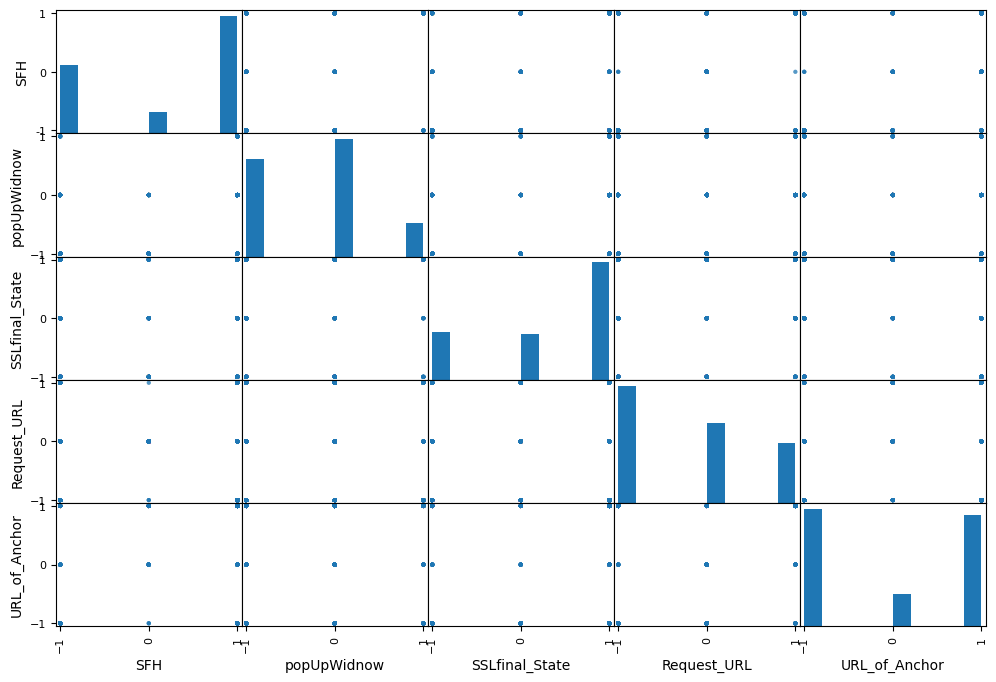

In [14]:
# Q.II.ii) Scatter plot of the features selected

from pandas.plotting import scatter_matrix

attributes = ["SFH", "popUpWidnow", "SSLfinal_State", "Request_URL", "URL_of_Anchor"]
scatter_matrix(website_dataframe[attributes], figsize=(12, 8))
plt.show()

Not very clear from the PCC scatter plot.
Deduced relationships of the data attributes from the PCC table.

## Q.3. Splitting into Training, Testing and Validation set

In [15]:
# Q.III.i) Correctly splitting data as testing, training and validation

from sklearn.model_selection import train_test_split

# Feature Selection 
X = website_dataframe[attributes]  # Features
y = website_dataframe['Result']  # Target variable

# Split the data into training (60%), total_testing (testing 20% and validation 20%) sets

X_train, X_total_test, y_train, y_total_test = train_test_split(X, y, train_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_total_test, y_total_test, test_size=0.5, random_state=42)

print("\nX Training data shape:", X_train.shape)
print("X Testing data shape:", X_test.shape)
print("X Validation data shape:", X_val.shape)

print("\nY Training data shape:", y_train.shape)
print("Y Testing data shape:", y_test.shape)
print("Y Validation data shape:", y_val.shape)



X Training data shape: (811, 5)
X Testing data shape: (271, 5)
X Validation data shape: (271, 5)

Y Training data shape: (811,)
Y Testing data shape: (271,)
Y Validation data shape: (271,)


The dataset is first divided into 2 parts train(60%) and total test(40%)\
Out of the total test 50% (of the total set) = 20% of the dataset is for testing set and 50% (of total test set) = 20% of the dataset is validation set.

So the dataset train : test : val = 3:1:1, which is represented in the shape above.

In [124]:
# Q.III.ii) Verify if the test portion representative of the entire data set

test_mean = y_test.mean()
train_mean = y_train.mean()
val_mean = y_val.mean()
total_mean = website_dataframe["Result"].mean()

print("total_mean = ", total_mean)
print("train_mean = ", train_mean)
print("test_mean = ", test_mean)
print("val_mean = ", val_mean)

total_mean =  -0.11382113821138211
train_mean =  -0.10480887792848335
test_mean =  -0.0959409594095941
val_mean =  -0.15867158671586715


The means are closely similar, hence representative of the original dataframe

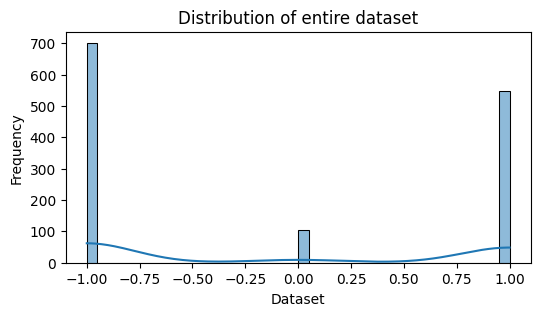

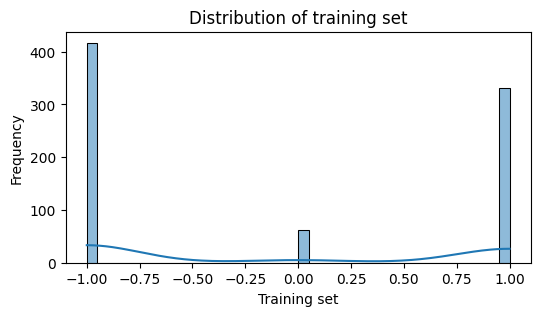

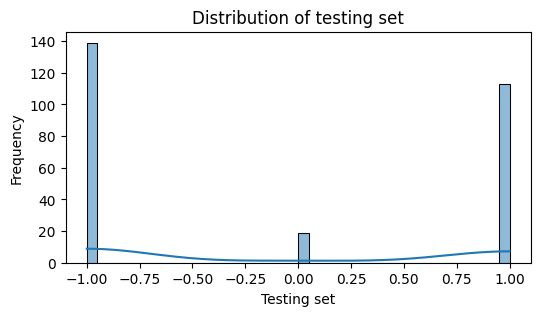

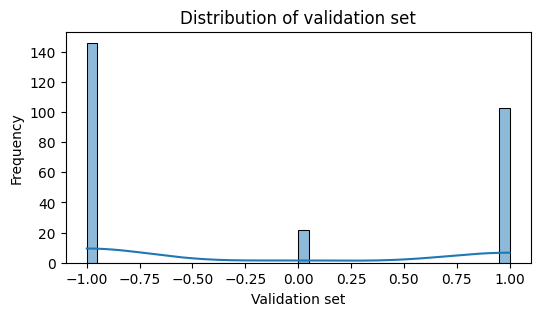

In [17]:
# Q.III.ii) Test and Validation portions of the data are representative of the entire dataset
# Show Distribution of Training and Test set data

plt.figure(figsize=(6, 3))

sns.histplot(y, kde=True, bins = 40)
plt.title(f'Distribution of entire dataset')
plt.xlabel('Dataset')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(y_train, kde=True, bins = 40)
plt.title(f'Distribution of training set')
plt.xlabel('Training set')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(y_test, kde=True, bins = 40)
plt.title(f'Distribution of testing set')
plt.xlabel('Testing set')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(y_val, kde=True, bins = 40)
plt.title(f'Distribution of validation set')
plt.xlabel('Validation set')
plt.ylabel('Frequency')
plt.show()

The distribution is closely similar, hence verified that the test and training set are representative of the original dataframe.

# Training and Modelling

## Q.4.A Multinomial Logistic Regression (Softmax Regression)

In [33]:
# Q.4.A.ii) Grid search to get the best hyperparameters

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
    'max_iter': [100, 500, 1000]  
}

logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=10000)

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.8249110050746042


In [113]:
# Q.4.B.ii) Tweaking the hyperparameters manually (Results reported in the markdown below).

from itertools import product
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
    'max_iter': [100, 500, 1000]  
}

results = []
for C, solver, max_iter in product(param_grid['C'], param_grid['solver'], param_grid['max_iter']):
    logistic_regression = LogisticRegression(multi_class='multinomial', C=C, solver=solver, max_iter=10000)
    logistic_regression.fit(X_train, y_train)

    y_test_pred = logistic_regression.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)

    results.append({
        'C': C,
        'solver': solver,
        'max_iter': max_iter,
        'accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='accuracy', ascending=False).head())


       C solver  max_iter  accuracy
17  0.01  lbfgs      1000  0.826568
23  0.01   saga      1000  0.826568
19  0.01    sag       500  0.826568
18  0.01    sag       100  0.826568
22  0.01   saga       500  0.826568


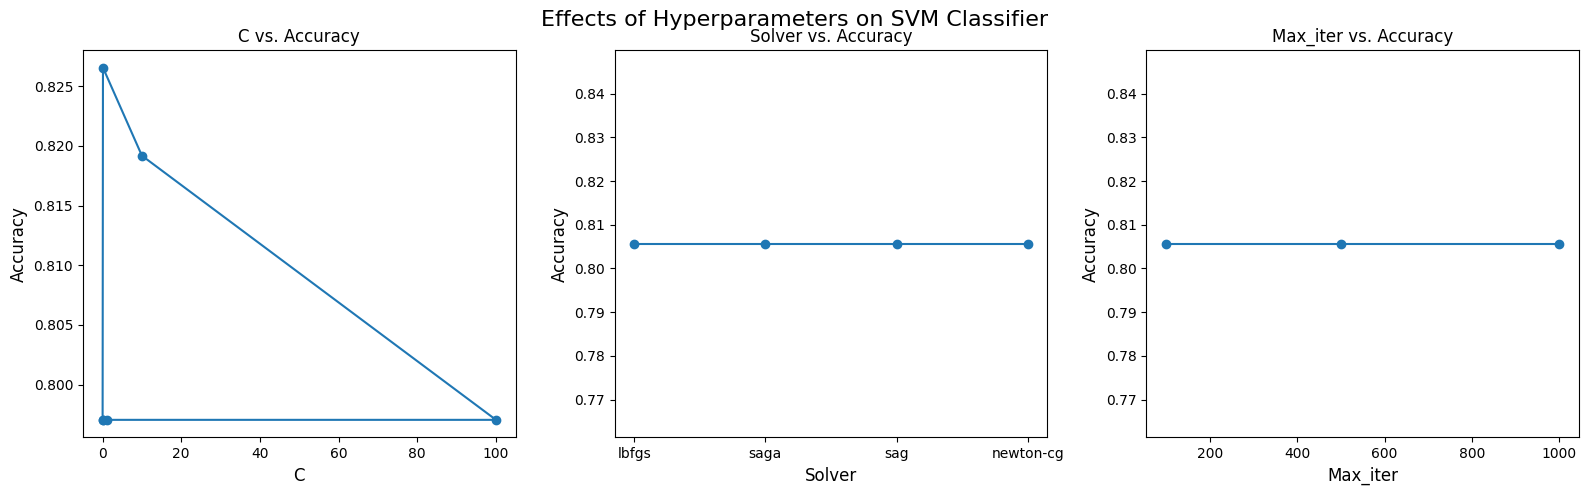

In [115]:
# Q.4.A.ii) Softmax Regression - Analysis of hyperparameter tuning (and its impact)/ Manual tweaking: 

import matplotlib.pyplot as plt

results_df_sorted = results_df.sort_values(by='accuracy', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle("Effects of Hyperparameters on SVM Classifier", fontsize=16)

# 'C' analysis
C_values = results_df_sorted['C'].unique()
accuracy_values = results_df_sorted.groupby('C')['accuracy'].mean()
axes[0].plot(C_values, accuracy_values, marker='o')
axes[0].set_title("C vs. Accuracy")
axes[0].set_xlabel("C", fontsize=12)  
axes[0].set_ylabel("Accuracy", fontsize=12)  

# 'Solver' analysis
solver_values = results_df_sorted['solver'].unique()
accuracy_values = results_df_sorted.groupby('solver')['accuracy'].mean()
axes[1].plot(solver_values, accuracy_values, marker='o')
axes[1].set_title("Solver vs. Accuracy")
axes[1].set_xlabel("Solver", fontsize=12)  
axes[1].set_ylabel("Accuracy", fontsize=12)  

# 'Max_iter' analysis
max_iter_values = results_df_sorted['max_iter'].unique()
accuracy_values = results_df_sorted.groupby('max_iter')['accuracy'].mean()
axes[2].plot(max_iter_values, accuracy_values, marker='o')
axes[2].set_title("Max_iter vs. Accuracy")
axes[2].set_xlabel("Max_iter", fontsize=12)  
axes[2].set_ylabel("Accuracy", fontsize=12)  

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [67]:
# Q.4.A.i) Training the Softmax Regression model using the hyperparametes found in grid search.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Feature Scaling - not required in this case as all values are between -1 and 1 by default
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

softmax_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=0.01, max_iter=100)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=0.01, multi_class='multinomial', solver='newton-cg')

Q.IV.A.iii) Analysis of hyperarameter tuning (and its impact): 

On doing the grid search the best parameters were found to be C = 0.1, solver = newton-cg and max-iter = 100.\
On manually tweaking the hyperparameters :
1. C = 0.01 seemed to give an higher accuracy (0.83) as compared to C = 0.1 (given by grid search) with a relatively lower accuracy of 0.82
2. On increasing the C value the accuracy kept decreasing signifies the inverse strength of regularisation
3. No effect on accuracy when tweaking solver hyperparameter.
4. When the max-iter was < 100, the model did not converge (which was the accurate result given by Grid search)

In [66]:
# Q.4.A.ii) Reporting the training, testing and validation performance

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_pred = softmax_reg.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
cm_smr_train = confusion_matrix(y_train, y_train_pred)

y_test_pred = softmax_reg.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
cm_smr_test = confusion_matrix(y_test, y_test_pred)

y_val_pred = softmax_reg.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
cm_smr_val = confusion_matrix(y_val, y_val_pred)

train_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [accuracy_train, precision_train, recall_train, f1_train]
})

test_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Test Set': [accuracy_test, precision_test, recall_test, f1_test]
})

val_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Validation Set': [accuracy_val, precision_val, recall_val, f1_val]
})

results_table = pd.concat([train_results, test_results, val_results], axis=1)

print("Performance Evaluation Results:")
print(results_table)

print("\nConfusion Matrix on Train Data:")
confusion_df_train = pd.DataFrame(cm_smr_train, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_train)

print("\nConfusion Matrix on Test Data:")
confusion_df_test = pd.DataFrame(cm_smr_test, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_test)

print("\nConfusion Matrix on Validation Set:")
confusion_df_val = pd.DataFrame(cm_smr_val, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_val)


Performance Evaluation Results:
      Metric  Train Set     Metric  Test Set     Metric  Validation Set
0   Accuracy   0.828607   Accuracy  0.826568   Accuracy        0.822878
1  Precision   0.765168  Precision  0.768638  Precision        0.755584
2     Recall   0.828607     Recall  0.826568     Recall        0.822878
3   F1 Score   0.795573   F1 Score  0.796549   F1 Score        0.787749

Confusion Matrix on Train Data:
     -1   0    1
-1  382   0   35
 0   34   0   28
 1   42   0  290

Confusion Matrix on Test Data:
     -1   0    1
-1  124   0   15
 0   12   0    7
 1   13   0  100

Confusion Matrix on Validation Set:
     -1   0   1
-1  137   0   9
 0    7   0  15
 1   17   0  86


Explanation of the Testing set Confusion Matrix

Confusion Matrix : Out of 271 samples 224 were correctly classified\
Signifies that 124 instances were correctly classified as phishing websites.\
And 100 instances were correctly classified as safe websites.

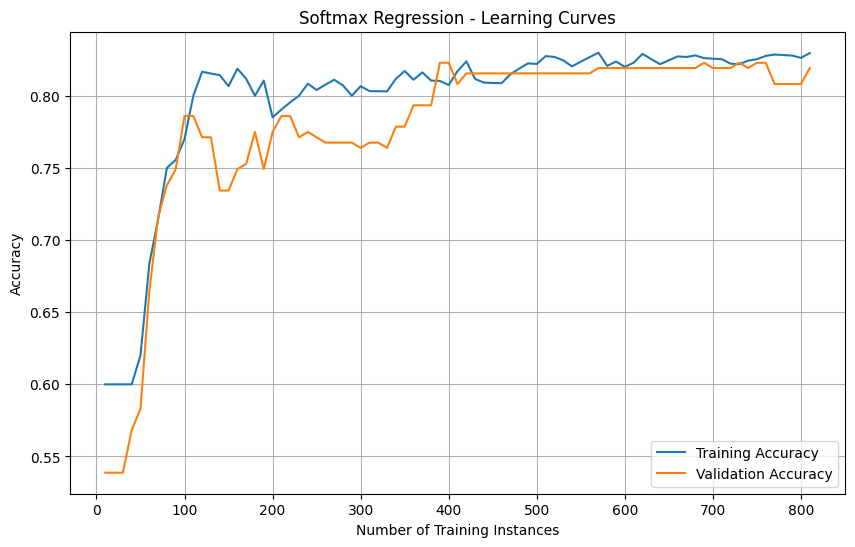

In [68]:
# Q.4.A.ii) Performance evaluation to check the acurracy vs number of training instances

train_accuracies = []
val_accuracies = []
sample_sizes = []

for i in range(10, len(X_train), 10):
    X_subset = X_train[:i]
    y_subset = y_train[:i]

    softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.01, max_iter=1000)
    softmax_reg.fit(X_subset, y_subset)

    y_train_pred = softmax_reg.predict(X_subset)
    train_accuracy = accuracy_score(y_subset, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = softmax_reg.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    sample_sizes.append(i)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_accuracies, label="Training Accuracy")
plt.plot(sample_sizes, val_accuracies, label="Validation Accuracy")
plt.xlabel("Number of Training Instances")
plt.ylabel("Accuracy")
plt.title("Softmax Regression - Learning Curves")
plt.legend()
plt.grid()
plt.show()




In [ ]:
# Q.4.A.i) Training the Softmax Regression model using the hyperparametes found in grid search.
# Repeated as this model is used in ensemble learning

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Feature Scaling - not required in this case as all values are between -1 and 1 by default
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

softmax_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=0.01, max_iter=100)
softmax_reg.fit(X_train, y_train)

## Q.4.B) Support Vector Machines

In [38]:
# Q.4.B.ii) Using grid search to get the best hyperparameters

from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'degree': [2, 3, 4],  # Only applicable for the 'poly' kernel
    'gamma': [0.1, 1, 10]
}

svm = SVC() 

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


In [119]:
# Q.4.B.i) Training the Softmax Regression model using the hyperparametes found in grid search. & 
# Q.4.B.ii) Tweaking the hyperparameters manually (Results reported in the markdown below).

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from itertools import product

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 10]
}

results = []

for C, kernel, gamma in product(param_grid['C'], param_grid['kernel'], param_grid['gamma']):
    svm = SVC(C=C, kernel=kernel, gamma=gamma)
    svm.fit(X_train, y_train)

    y_test_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)

    results.append({
        'C': C,
        'kernel': kernel,
        'gamma': gamma,
        'accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='accuracy', ascending=False).head())


       C kernel  gamma  accuracy
13   1.0    rbf    1.0  0.878229
23  10.0    rbf   10.0  0.874539
14   1.0    rbf   10.0  0.874539
4    0.1    rbf    1.0  0.867159
5    0.1    rbf   10.0  0.859779


In [120]:
# Q.4.B.i) Training the SVM Classifier model using the hyperparametes found in grid search.

svm = SVC(C=1, gamma=1, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=1, gamma=1)

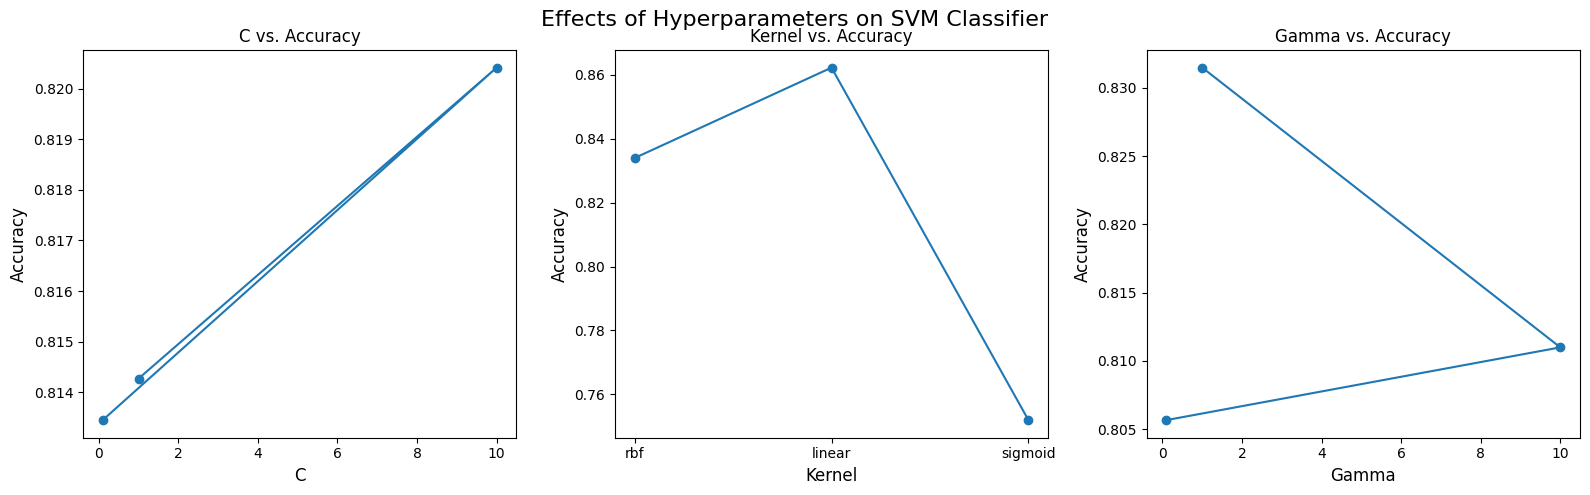

In [121]:
# Q.4.C.ii) SVM - Analysis of hyperparameter tuning (and its impact)/ Manual tweaking: 

import matplotlib.pyplot as plt

results_df_sorted = results_df.sort_values(by='accuracy', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle("Effects of Hyperparameters on SVM Classifier", fontsize=16)

# 'C' analysis
C_values = results_df_sorted['C'].unique()
accuracy_values = results_df_sorted.groupby('C')['accuracy'].mean()
axes[0].plot(C_values, accuracy_values, marker='o')
axes[0].set_title("C vs. Accuracy")
axes[0].set_xlabel("C", fontsize=12)  
axes[0].set_ylabel("Accuracy", fontsize=12)  

# 'Kernel' analysis
kernel_values = results_df_sorted['kernel'].unique()
accuracy_values = results_df_sorted.groupby('kernel')['accuracy'].mean()
axes[1].plot(kernel_values, accuracy_values, marker='o')
axes[1].set_title("Kernel vs. Accuracy")
axes[1].set_xlabel("Kernel", fontsize=12)  
axes[1].set_ylabel("Accuracy", fontsize=12)  

# 'Gamma' analysis
gamma_values = results_df_sorted['gamma'].unique()
accuracy_values = results_df_sorted.groupby('gamma')['accuracy'].mean()
axes[2].plot(gamma_values, accuracy_values, marker='o')
axes[2].set_title("Gamma vs. Accuracy")
axes[2].set_xlabel("Gamma", fontsize=12)  
axes[2].set_ylabel("Accuracy", fontsize=12)  

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



Q.IV.B.ii) SVM - Analysis of hyperarameter tuning (and its impact): 

On doing the grid search the best parameters were found to be C = 1, kernel = 'rbf' and gamma='1'. With an accuracy of 0.88.\
(Not mentioning degree as degree only matters when kernel = 'poly')

On manually tweaking the hyperparameters :
1. C = 1 gave the best accuracy (0.88). Increasing (C=10 -> Accuracy=0.86) or decreasing(C=0.1 -> Accuracy=0.87) would give a lower accuracy.\
        A smaller C allows more misclassification but encourages a simpler decision boundary,while a larger C reduces misclassification at the expense of a more complex boundary.
2. With kernel=linear -> Accuracy=0.83, kernel=rbf -> Accuracy=0.87, kernel=sigmoid -> Accuracy=0.72 (Radial basis function seem to give much better performance)
3. gamma=0.1 -> Accuracy=0.83, gamma=0.1 -> Accuracy=0.72, gamma=10 -> Accuracy=0.73.\
        High gamma values can lead to overfitting, while low gamma values can result in underfitting when using non-linear kernels.

In [122]:
# Q.4.B.iii) Reporting the training, testing and validation performance

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_pred = svm.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
cm_svm_train = confusion_matrix(y_train, y_train_pred)

y_test_pred = svm.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
cm_svm_test = confusion_matrix(y_test, y_test_pred)

y_val_pred = svm.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
cm_svm_val = confusion_matrix(y_val, y_val_pred)

train_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [accuracy_train, precision_train, recall_train, f1_train]
})

test_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Test Set': [accuracy_test, precision_test, recall_test, f1_test]
})

val_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Validation Set': [accuracy_val, precision_val, recall_val, f1_val]
})

results_table = pd.concat([train_results, test_results, val_results], axis=1)

print("Performance Evaluation Results:")
print(results_table)

print("\nConfusion Matrix on Train Data:")
confusion_df_train = pd.DataFrame(cm_svm_train, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_train)

print("\nConfusion Matrix on Test Data:")
confusion_df_test = pd.DataFrame(cm_svm_test, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_test)

print("\nConfusion Matrix on Validation Set:")
confusion_df_val = pd.DataFrame(cm_svm_val, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_val)


Performance Evaluation Results:
      Metric  Train Set     Metric  Test Set     Metric  Validation Set
0   Accuracy   0.893958   Accuracy  0.878229   Accuracy        0.833948
1  Precision   0.896964  Precision  0.885334  Precision        0.831965
2     Recall   0.893958     Recall  0.878229     Recall        0.833948
3   F1 Score   0.882046   F1 Score  0.862873   F1 Score        0.832799

Confusion Matrix on Train Data:
     -1   0    1
-1  403   0   14
 0   21  19   22
 1   28   1  303

Confusion Matrix on Test Data:
     -1   0    1
-1  131   0    8
 0   10   4    5
 1   10   0  103

Confusion Matrix on Validation Set:
     -1   0   1
-1  130   7   9
 0    1  10  11
 1   14   3  86


Explanation of the confusion matrix on test data

Confusion Matrix : Out of 271 samples 234 were correctly classified\
Signifies that 131 instances were correctly classified as phishing websites.\
And 103 instances were correctly classified as safe websites.

We see that the performance of the SVM model is better in the train set > test set > validation set.

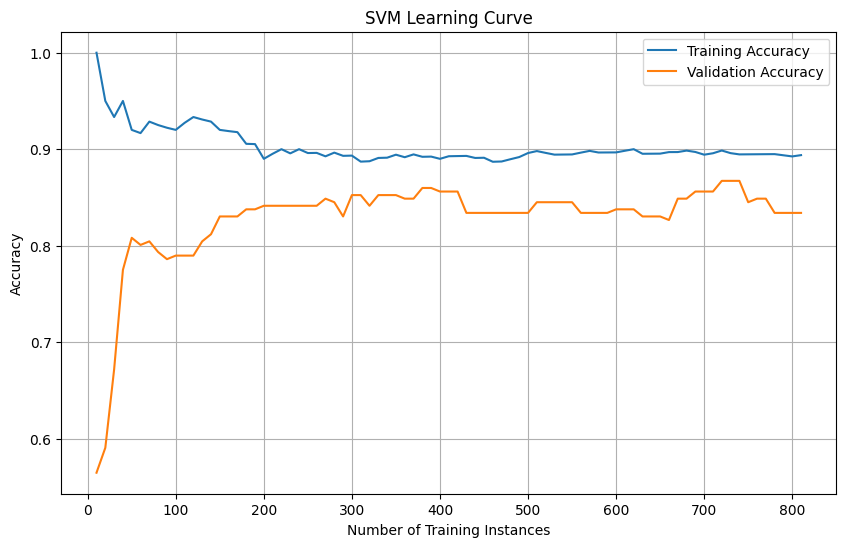

In [123]:
# Q.4.B.iii) Performance evaluation to check the acurracy vs number of training instances

train_accuracies = []
val_accuracies = []
sample_sizes = []

for i in range(10, len(X_train), 10):

    X_subset = X_train[:i]
    y_subset = y_train[:i]

    svm = SVC(**best_params)
    svm.fit(X_subset, y_subset)

    y_train_pred = svm.predict(X_subset)
    train_accuracy = accuracy_score(y_subset, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = svm.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    sample_sizes.append(i)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_accuracies, label="Training Accuracy")
plt.plot(sample_sizes, val_accuracies, label="Validation Accuracy")
plt.xlabel("Number of Training Instances")
plt.ylabel("Accuracy")
plt.title("SVM Learning Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Q.4.B.i) Training the SVM Classifier model using the hyperparametes found in grid search.

svm = SVC(C=1, gamma=1, kernel='rbf')
svm.fit(X_train, y_train)

## Q.4.C. Random Forest Classifier

In [22]:
# Q.4.C.ii) Using grid search to get the best hyperparameters

from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],          
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [88]:
# Q.4.C.ii) Manual tweaking to get the best hyperparameters.

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],          
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}
results = []

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                rf_classifier = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )
                rf_classifier.fit(X_train, y_train)
                y_test_pred = rf_classifier.predict(X_test)
                accuracy = accuracy_score(y_test, y_test_pred)

                results.append({
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'accuracy': accuracy
                })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='accuracy', ascending=False).head())


    n_estimators  max_depth  min_samples_split  min_samples_leaf  accuracy
72           200        NaN                  2                 1  0.892989
84           200       10.0                  5                 1  0.889299
90           200       20.0                  2                 1  0.885609
66           100       30.0                  5                 1  0.881919
9             50       10.0                  2                 1  0.881919


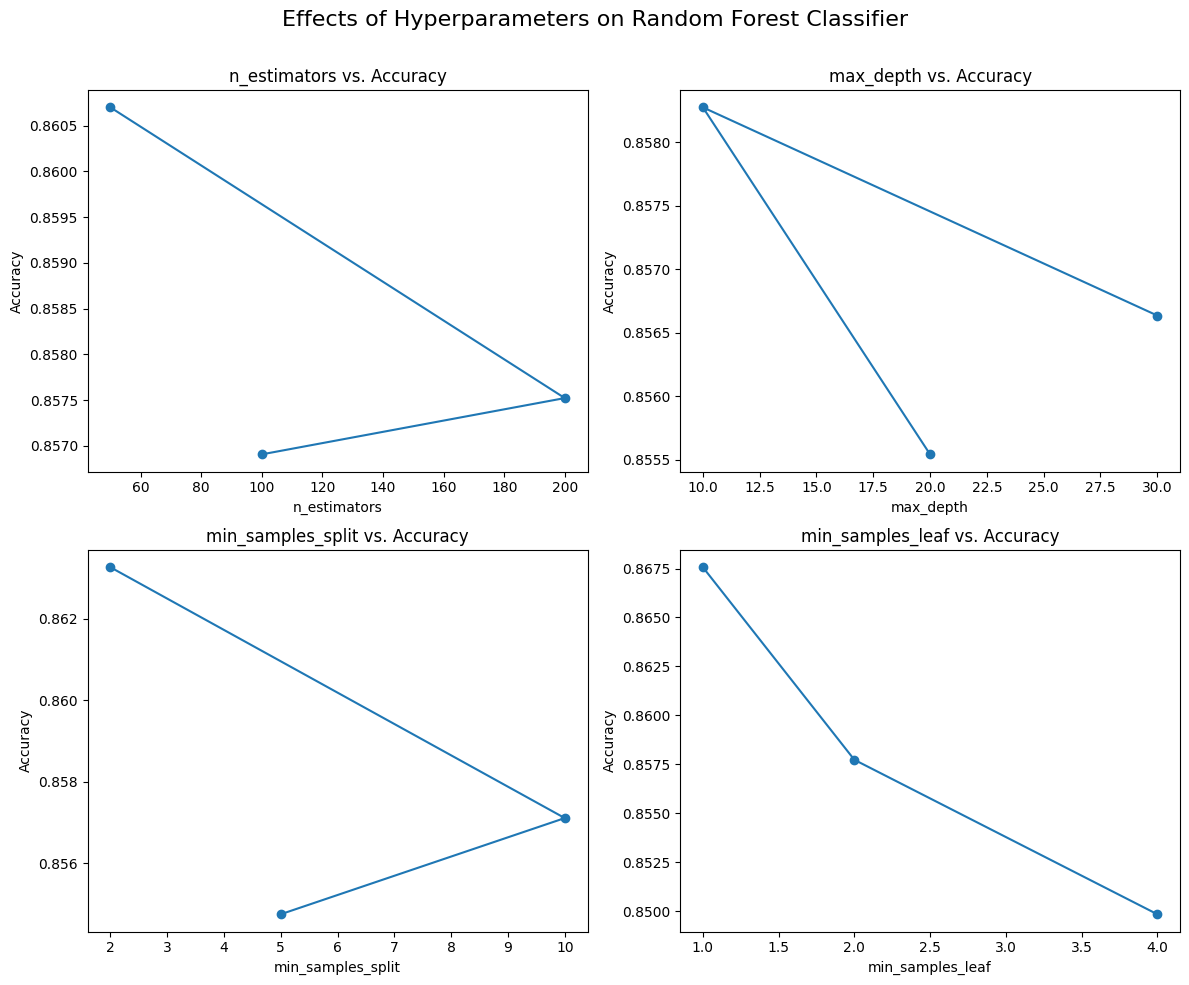

In [86]:
# Q.4.C.ii) Random Forest - Analysis of hyperparameter tuning (and its impact): 

import matplotlib.pyplot as plt

results_df_sorted = results_df.sort_values(by='accuracy', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Effects of Hyperparameters on Random Forest Classifier", fontsize=16)

# 'n_estimators' analysis
n_estimators_values = results_df_sorted['n_estimators'].unique()
accuracy_values = results_df_sorted.groupby('n_estimators')['accuracy'].mean()
axes[0, 0].plot(n_estimators_values, accuracy_values, marker='o')
axes[0, 0].set_title("n_estimators vs. Accuracy")
axes[0, 0].set_xlabel("n_estimators")
axes[0, 0].set_ylabel("Accuracy")

# 'min_samples_split' analysis
min_samples_split_values = results_df_sorted['min_samples_split'].unique()
accuracy_values = results_df_sorted.groupby('min_samples_split')['accuracy'].mean()
axes[1, 0].plot(min_samples_split_values, accuracy_values, marker='o')
axes[1, 0].set_title("min_samples_split vs. Accuracy")
axes[1, 0].set_xlabel("min_samples_split")
axes[1, 0].set_ylabel("Accuracy")

# 'min_samples_leaf' analysis
min_samples_leaf_values = results_df_sorted['min_samples_leaf'].unique()
accuracy_values = results_df_sorted.groupby('min_samples_leaf')['accuracy'].mean()
axes[1, 1].plot(min_samples_leaf_values, accuracy_values, marker='o')
axes[1, 1].set_title("min_samples_leaf vs. Accuracy")
axes[1, 1].set_xlabel("min_samples_leaf")
axes[1, 1].set_ylabel("Accuracy")

# 'max_depth' analysis
results_df_sorted = results_df_sorted.dropna(subset=['max_depth'])
max_depth_values = results_df_sorted['max_depth'].unique()
accuracy_values = results_df_sorted.groupby('max_depth')['accuracy'].mean()
axes[0, 1].plot(max_depth_values, accuracy_values, marker='o')
axes[0, 1].set_title("max_depth vs. Accuracy")
axes[0, 1].set_xlabel("max_depth")
axes[0, 1].set_ylabel("Accuracy")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


Q.4.C.ii) Random Forest - Analysis of hyperarameter tuning (and its impact): 

After tweaking the hyperparameters manually it was observed that the best accuracy results were given by the hyperparamters:\
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}\
Best Accuracy : 0.89

Whereas through grid search the best hyperparameters were :\
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Corresponding Accuracy : 0.86

However, accuracy may not be a suitable metric to get the best hyperparameter.\
It could lead to the model leading to overfit.

Effects of the hyperparameters :
1. n_estimators:\
    It helps to reduce overfitting by aggregating predictions from multiple trees.\
    However, there is a point of diminishing returns, and adding too many trees may not significantly improve performance.
2. max_depth:\
    A smaller value for max_depth creates shallower trees, which are less likely to overfit but may underfit.\
    A larger value for max_depth allows trees to grow deeper and capture more complex relationships in the data, but this may lead to overfitting.
3. min_samples_split:\
    A smaller value leads to more splitting, potentially resulting in a more complex model. (Overfitting)
    A larger value enforces more samples to be present in a node before splitting, which can lead to a simpler model. (Underfitting)
4. min_samples_leaf:\
    Smaller values can lead to finer-grained leaves and a more complex model. (Overfit)\
    Larger values enforce more samples to be in each leaf, which can simplify the model. (underfit)

In [89]:
# Q.4.C.i) Random Forest Classifier - Training the model with the best hyperparameters

rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [91]:
# Q.4.C.iii) Reporting the training, testing and validation performance

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_pred = rf_classifier.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
cm_rfc_train = confusion_matrix(y_train, y_train_pred)

y_test_pred = rf_classifier.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
cm_rfc_test = confusion_matrix(y_test, y_test_pred)

y_val_pred = rf_classifier.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
cm_rfc_val = confusion_matrix(y_val, y_val_pred)

train_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [accuracy_train, precision_train, recall_train, f1_train]
})

test_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Test Set': [accuracy_test, precision_test, recall_test, f1_test]
})

val_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Validation Set': [accuracy_val, precision_val, recall_val, f1_val]
})

results_table = pd.concat([train_results, test_results, val_results], axis=1)

print("Performance Evaluation Results:")
print(results_table)

print("\nConfusion Matrix on Train Data:")
confusion_df_train = pd.DataFrame(cm_rfc_train, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_train)

print("\nConfusion Matrix on Test Data:")
confusion_df_test = pd.DataFrame(cm_rfc_test, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_test)

print("\nConfusion Matrix on Validation Set:")
confusion_df_val = pd.DataFrame(cm_rfc_val, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_val)


Performance Evaluation Results:
      Metric  Train Set     Metric  Test Set     Metric  Validation Set
0   Accuracy   0.893958   Accuracy  0.878229   Accuracy        0.859779
1  Precision   0.896913  Precision  0.885334  Precision        0.854575
2     Recall   0.893958     Recall  0.878229     Recall        0.859779
3   F1 Score   0.882078   F1 Score  0.862873   F1 Score        0.852562

Confusion Matrix on Train Data:
     -1   0    1
-1  402   0   15
 0   21  19   22
 1   27   1  304

Confusion Matrix on Test Data:
     -1   0    1
-1  131   0    8
 0   10   4    5
 1   10   0  103

Confusion Matrix on Validation Set:
     -1   0   1
-1  139   0   7
 0    2   9  11
 1   15   3  85


Explanation of the confusion matrix on test data

Confusion Matrix : Out of 271 samples 234 were correctly classified\
Signifies that 131 instances were correctly classified as phishing websites.\
And 103 instances were correctly classified as safe websites.

In [93]:
# Feature importance

importances = rf_classifier.feature_importances_

feature_names = ['SFH','popUpWidnow','SSLfinal_State', 'Request_URL', 'URL_of_Anchor']
website_dataframe

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
          Feature  Importance
0             SFH    0.437063
2  SSLfinal_State    0.178075
1     popUpWidnow    0.156438
3     Request_URL    0.123508
4   URL_of_Anchor    0.104916


Observation:

Feature importance shows that SFH is the most important feature which correlates as obtained from the PCC table.

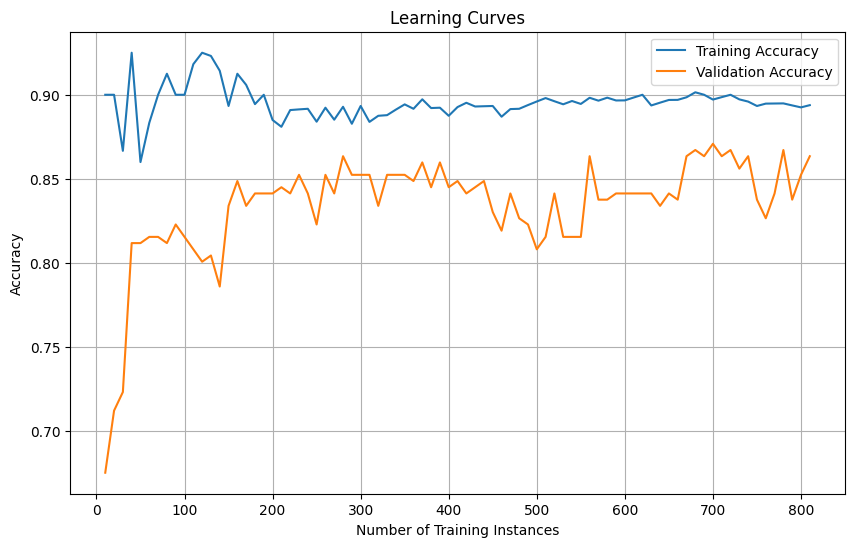

In [95]:
# Q.4.C.iii) Performance evaluation to check the acurracy vs number of training instances

train_accuracies = []
val_accuracies = []
sample_sizes = []

for i in range(10, len(X_train), 10):

    X_subset = X_train[:i]
    y_subset = y_train[:i]

    rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)
    rf_classifier.fit(X_subset, y_subset)

    y_train_pred = rf_classifier.predict(X_subset)
    train_accuracy = accuracy_score(y_subset, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = rf_classifier.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    sample_sizes.append(i)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_accuracies, label="Training Accuracy")
plt.plot(sample_sizes, val_accuracies, label="Validation Accuracy")
plt.xlabel("Number of Training Instances")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Q.4.C.i) Random Forest Classifier - Training the model with the best hyperparameters

rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50)
rf_classifier.fit(X_train, y_train)

## Q.5. Ensemble Learning

In [36]:
# Q.5.i) Ensemble of logistic regression(softmax), svm and random forest

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create an ensemble of classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('lr', softmax_reg),
    ('svm', svm),
    ('rf', rf_classifier)
], voting='hard')

ensemble_classifier.fit(X_train, y_train)
y_val_pred_ensemble = ensemble_classifier.predict(X_val)

val_accuracy_ensemble = accuracy_score(y_val, y_val_pred_ensemble)
print(f"Validation Accuracy of Ensemble: {val_accuracy_ensemble:.2f}")

y_test_pred_ensemble = ensemble_classifier.predict(X_test)
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)
print(f"Test Accuracy of Ensemble: {test_accuracy_ensemble:.2f}")


Validation Accuracy of Ensemble: 0.87
Test Accuracy of Ensemble: 0.88


In [96]:
# Q.5.ii) Reporting the training, testing and validation performance

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_train_pred = ensemble_classifier.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
cm_el_train = confusion_matrix(y_train, y_train_pred)

y_test_pred = ensemble_classifier.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
cm_el_test = confusion_matrix(y_test, y_test_pred)

y_val_pred = ensemble_classifier.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')
cm_el_val = confusion_matrix(y_val, y_val_pred)

train_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train Set': [accuracy_train, precision_train, recall_train, f1_train]
})

test_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Test Set': [accuracy_test, precision_test, recall_test, f1_test]
})

val_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Validation Set': [accuracy_val, precision_val, recall_val, f1_val]
})

results_table = pd.concat([train_results, test_results, val_results], axis=1)

print("Performance Evaluation Results:")
print(results_table)

print("\nConfusion Matrix on Train Data:")
confusion_df_train = pd.DataFrame(cm_el_train, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_train)

print("\nConfusion Matrix on Test Data:")
confusion_df_test = pd.DataFrame(cm_el_test, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_test)

print("\nConfusion Matrix on Validation Set:")
confusion_df_val = pd.DataFrame(cm_el_val, index=[-1, 0, 1], columns=[-1, 0, 1])
print(confusion_df_val)


Performance Evaluation Results:
      Metric  Train Set     Metric  Test Set     Metric  Validation Set
0   Accuracy   0.893958   Accuracy  0.878229   Accuracy        0.870849
1  Precision   0.896964  Precision  0.885334  Precision        0.865181
2     Recall   0.893958     Recall  0.878229     Recall        0.870849
3   F1 Score   0.882046   F1 Score  0.862873   F1 Score        0.863276

Confusion Matrix on Train Data:
     -1   0    1
-1  403   0   14
 0   21  19   22
 1   28   1  303

Confusion Matrix on Test Data:
     -1   0    1
-1  131   0    8
 0   10   4    5
 1   10   0  103

Confusion Matrix on Validation Set:
     -1   0   1
-1  141   0   5
 0    2   9  11
 1   14   3  86


Explanation of the confusion matrix on test data

Confusion Matrix : Out of 271 samples 234 were correctly classified\
Signifies that 131 instances were correctly classified as phishing websites.\
And 103 instances were correctly classified as safe websites.

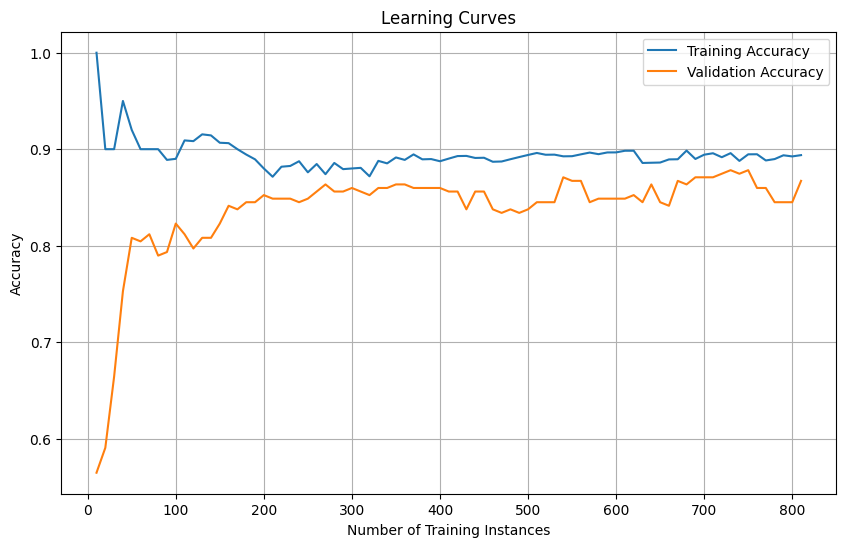

In [97]:
# Q.5.ii) Performance evaluation to check the acurracy vs number of training instances

train_accuracies = []
val_accuracies = []
sample_sizes = []

for i in range(10, len(X_train), 10):

    X_subset = X_train[:i]
    y_subset = y_train[:i]

    ensemble_classifier = VotingClassifier(estimators=[
    ('lr', softmax_reg),
    ('svm', svm),
    ('rf', rf_classifier)
    ], voting='hard')
    ensemble_classifier.fit(X_subset, y_subset)

    y_train_pred = ensemble_classifier.predict(X_subset)
    train_accuracy = accuracy_score(y_subset, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_val_pred = ensemble_classifier.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    sample_sizes.append(i)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_accuracies, label="Training Accuracy")
plt.plot(sample_sizes, val_accuracies, label="Validation Accuracy")
plt.xlabel("Number of Training Instances")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend()
plt.grid()
plt.show()

Q.5.iii) Accuracy of ensemble should exceed the performance of all the classifiers

| Accuracy           | Softmax Regression | SVM      | Random Forest | Ensemble Learning |
|--------------------|--------------------|----------|---------------|-------------------|
| Test Set           | 0.83               | 0.89     | 0.89          | 0.89              |
| Validation Set     | 0.83               | 0.88     | 0.88          | 0.88              |
| Training Set       | 0.82               | 0.83     | 0.86          | 0.87              |


Q.5.iv) Findings

The accuracy of SVM, Random Forest and Ensemble Learning seems comparable as compared to the softmax regression.
We see that the performance over the validation set keeps increasing (keeping Accuracy as the standard performance measure metric)

Performance of :
Softmax Regression Classifier < SVM Classifier < Random Forest Classifier < Ensemble Learning Classifier
With Ensemble Learning Classifier beating the performance of all the individual classifiers.
